In [135]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as skm
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import numpy as np

df = pd.read_table("../Data/wdbc.data", sep=",", header=None)

In [136]:
#1b
df = df.rename(columns={1: "Diagnosis"})
df.loc[(df['Diagnosis'] == "M"), 'Diagnosis'] = 1
df.loc[(df['Diagnosis'] == "B"), 'Diagnosis'] = 0
m = df.Diagnosis[df.Diagnosis == 1].index.tolist()
b = df.Diagnosis[df.Diagnosis == 0].index.tolist()
test_index = m[:30] + b[:50]
train_index = m[30:] + b[50:]

test_set = df.iloc[test_index]
train_set = df.iloc[train_index]
print(train_set)

          0  Diagnosis      2      3       4       5        6        7  \
33   854002          1  19.27  26.47  127.90  1162.0  0.09401  0.17190   
34   854039          1  16.13  17.88  107.00   807.2  0.10400  0.15590   
35   854253          1  16.74  21.59  110.10   869.5  0.09610  0.13360   
36   854268          1  14.25  21.72   93.63   633.0  0.09823  0.10980   
38   855133          1  14.99  25.20   95.54   698.8  0.09387  0.05131   
..      ...        ...    ...    ...     ...     ...      ...      ...   
558  925277          0  14.59  22.68   96.39   657.1  0.08473  0.13300   
559  925291          0  11.51  23.93   74.52   403.5  0.09261  0.10210   
560  925292          0  14.05  27.15   91.38   600.4  0.09929  0.11260   
561  925311          0  11.20  29.37   70.67   386.0  0.07449  0.03558   
568   92751          0   7.76  24.54   47.92   181.0  0.05263  0.04362   

           8        9  ...      22     23      24      25       26       27  \
33   0.16570  0.07593  ...  24.1

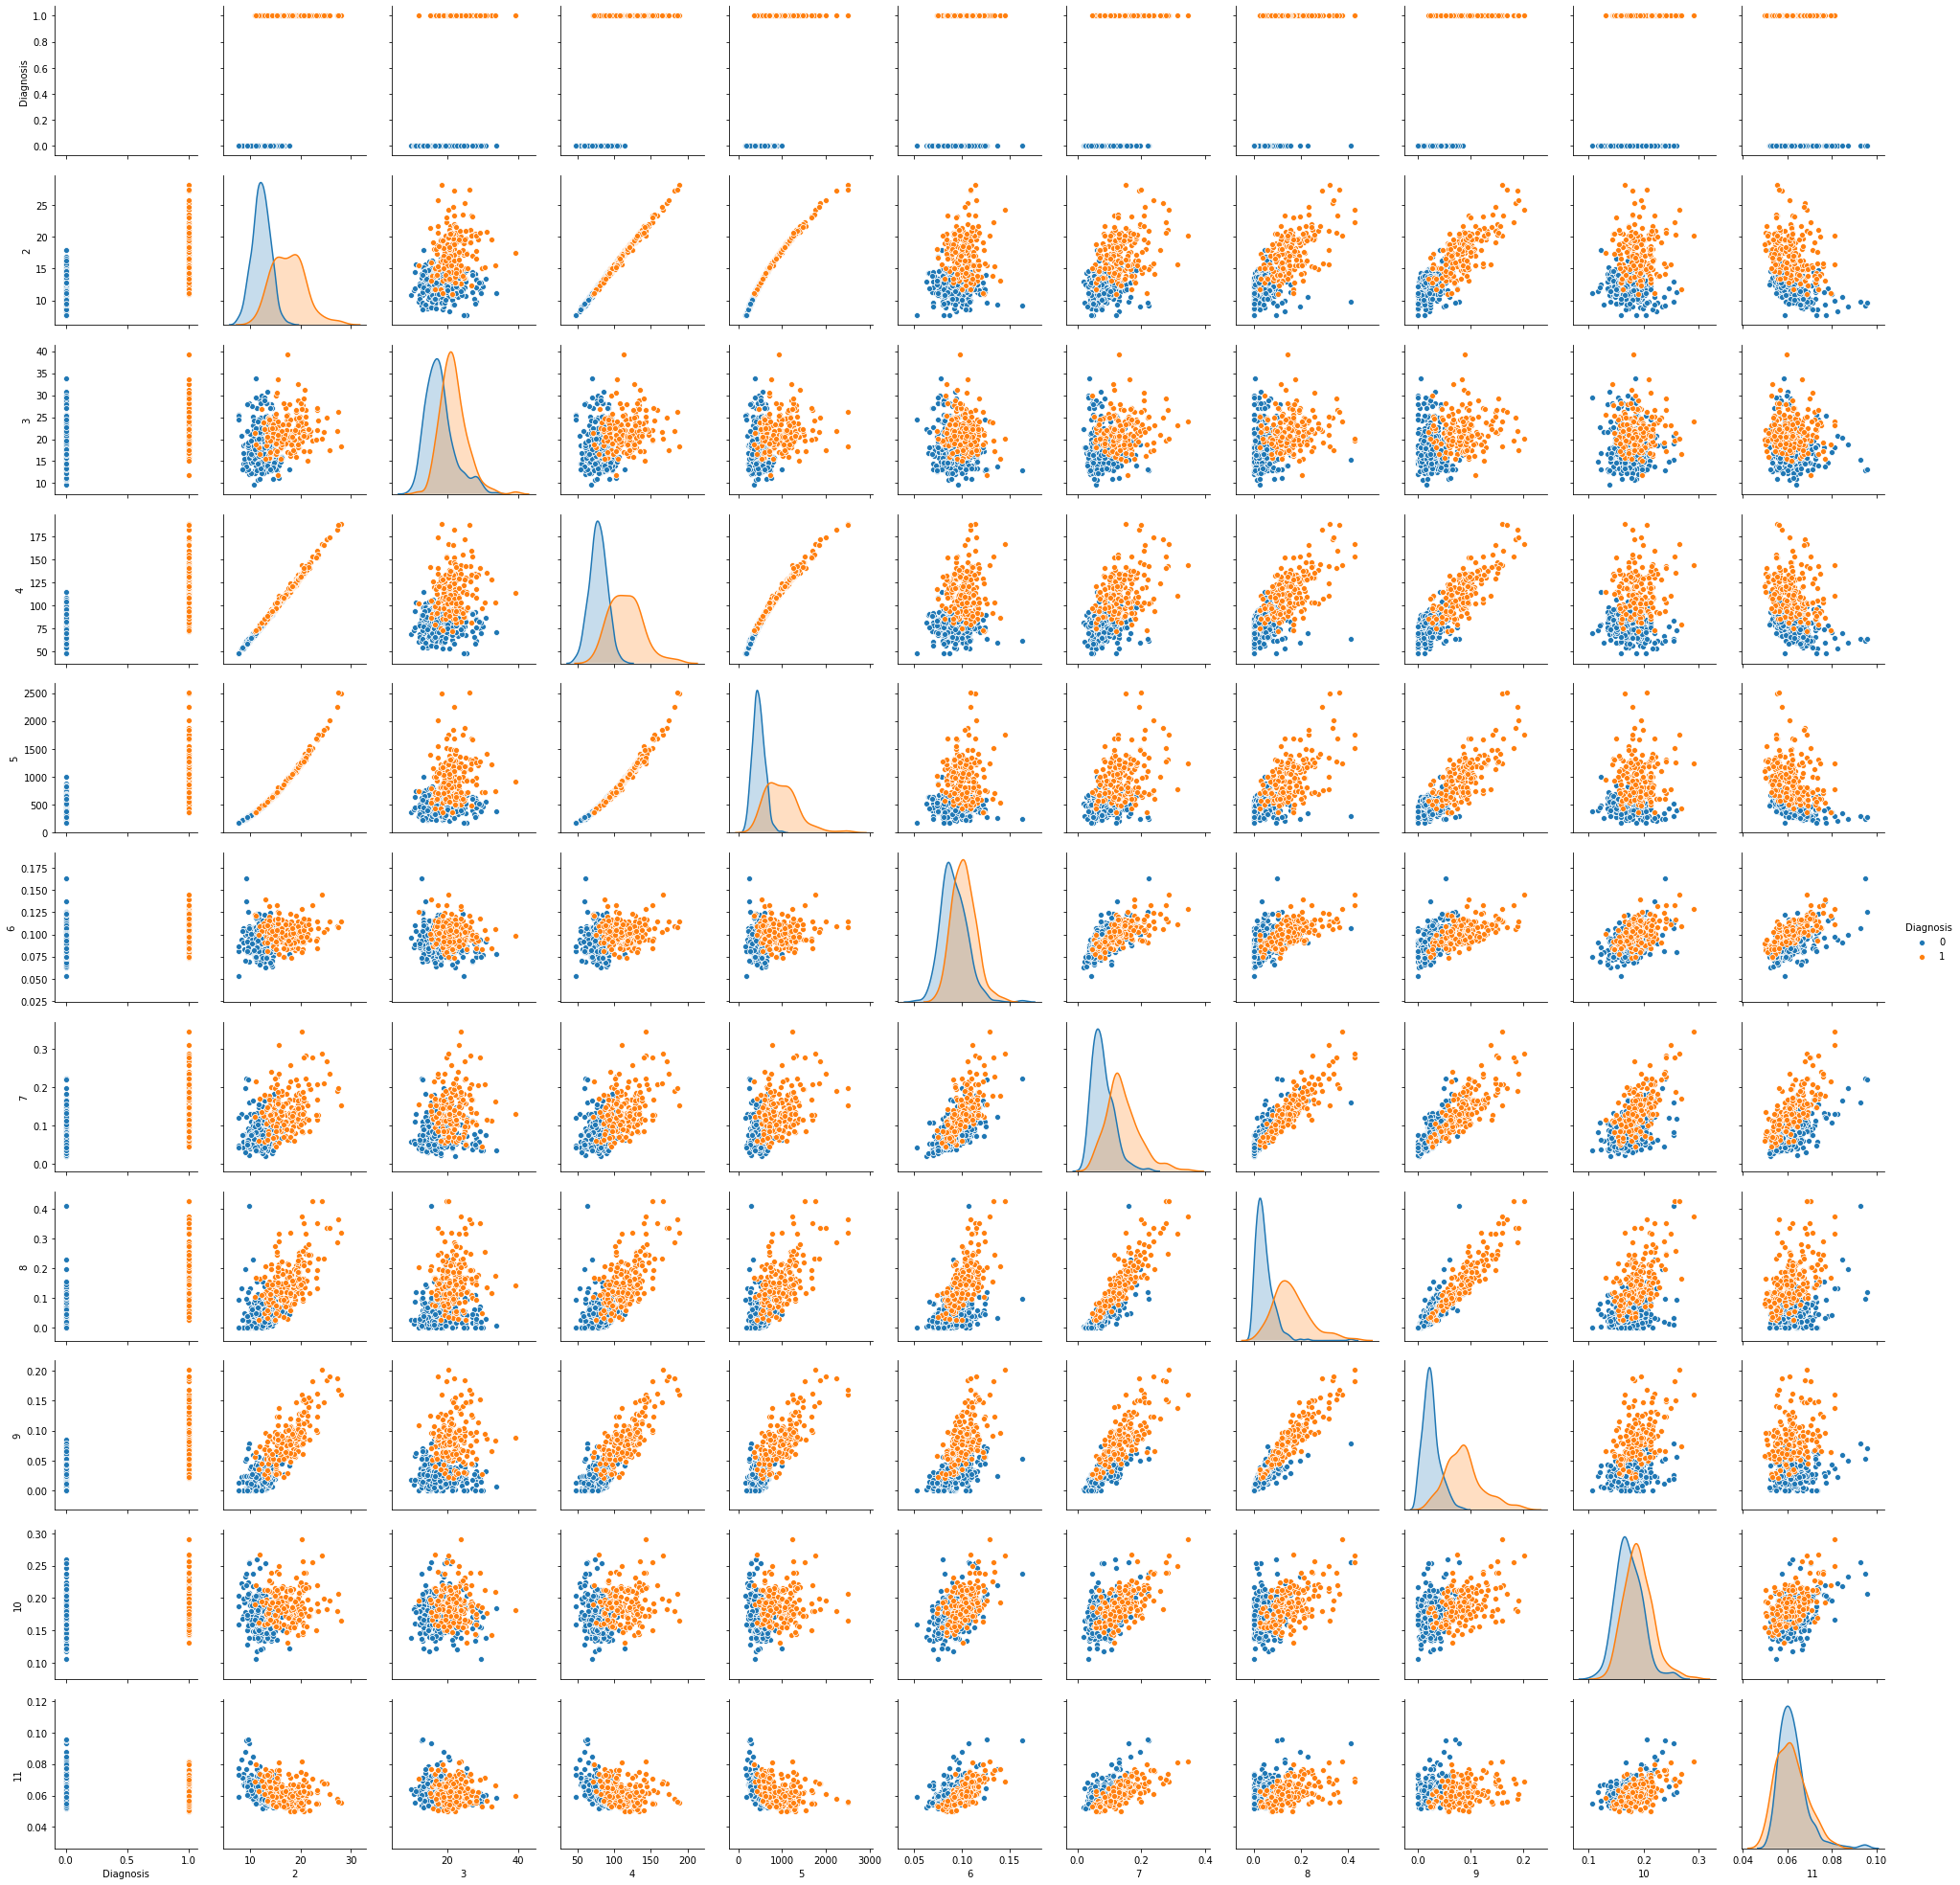

In [34]:
#1c i.
g = sns.pairplot(train_set.iloc[:, 1:12], hue='Diagnosis')

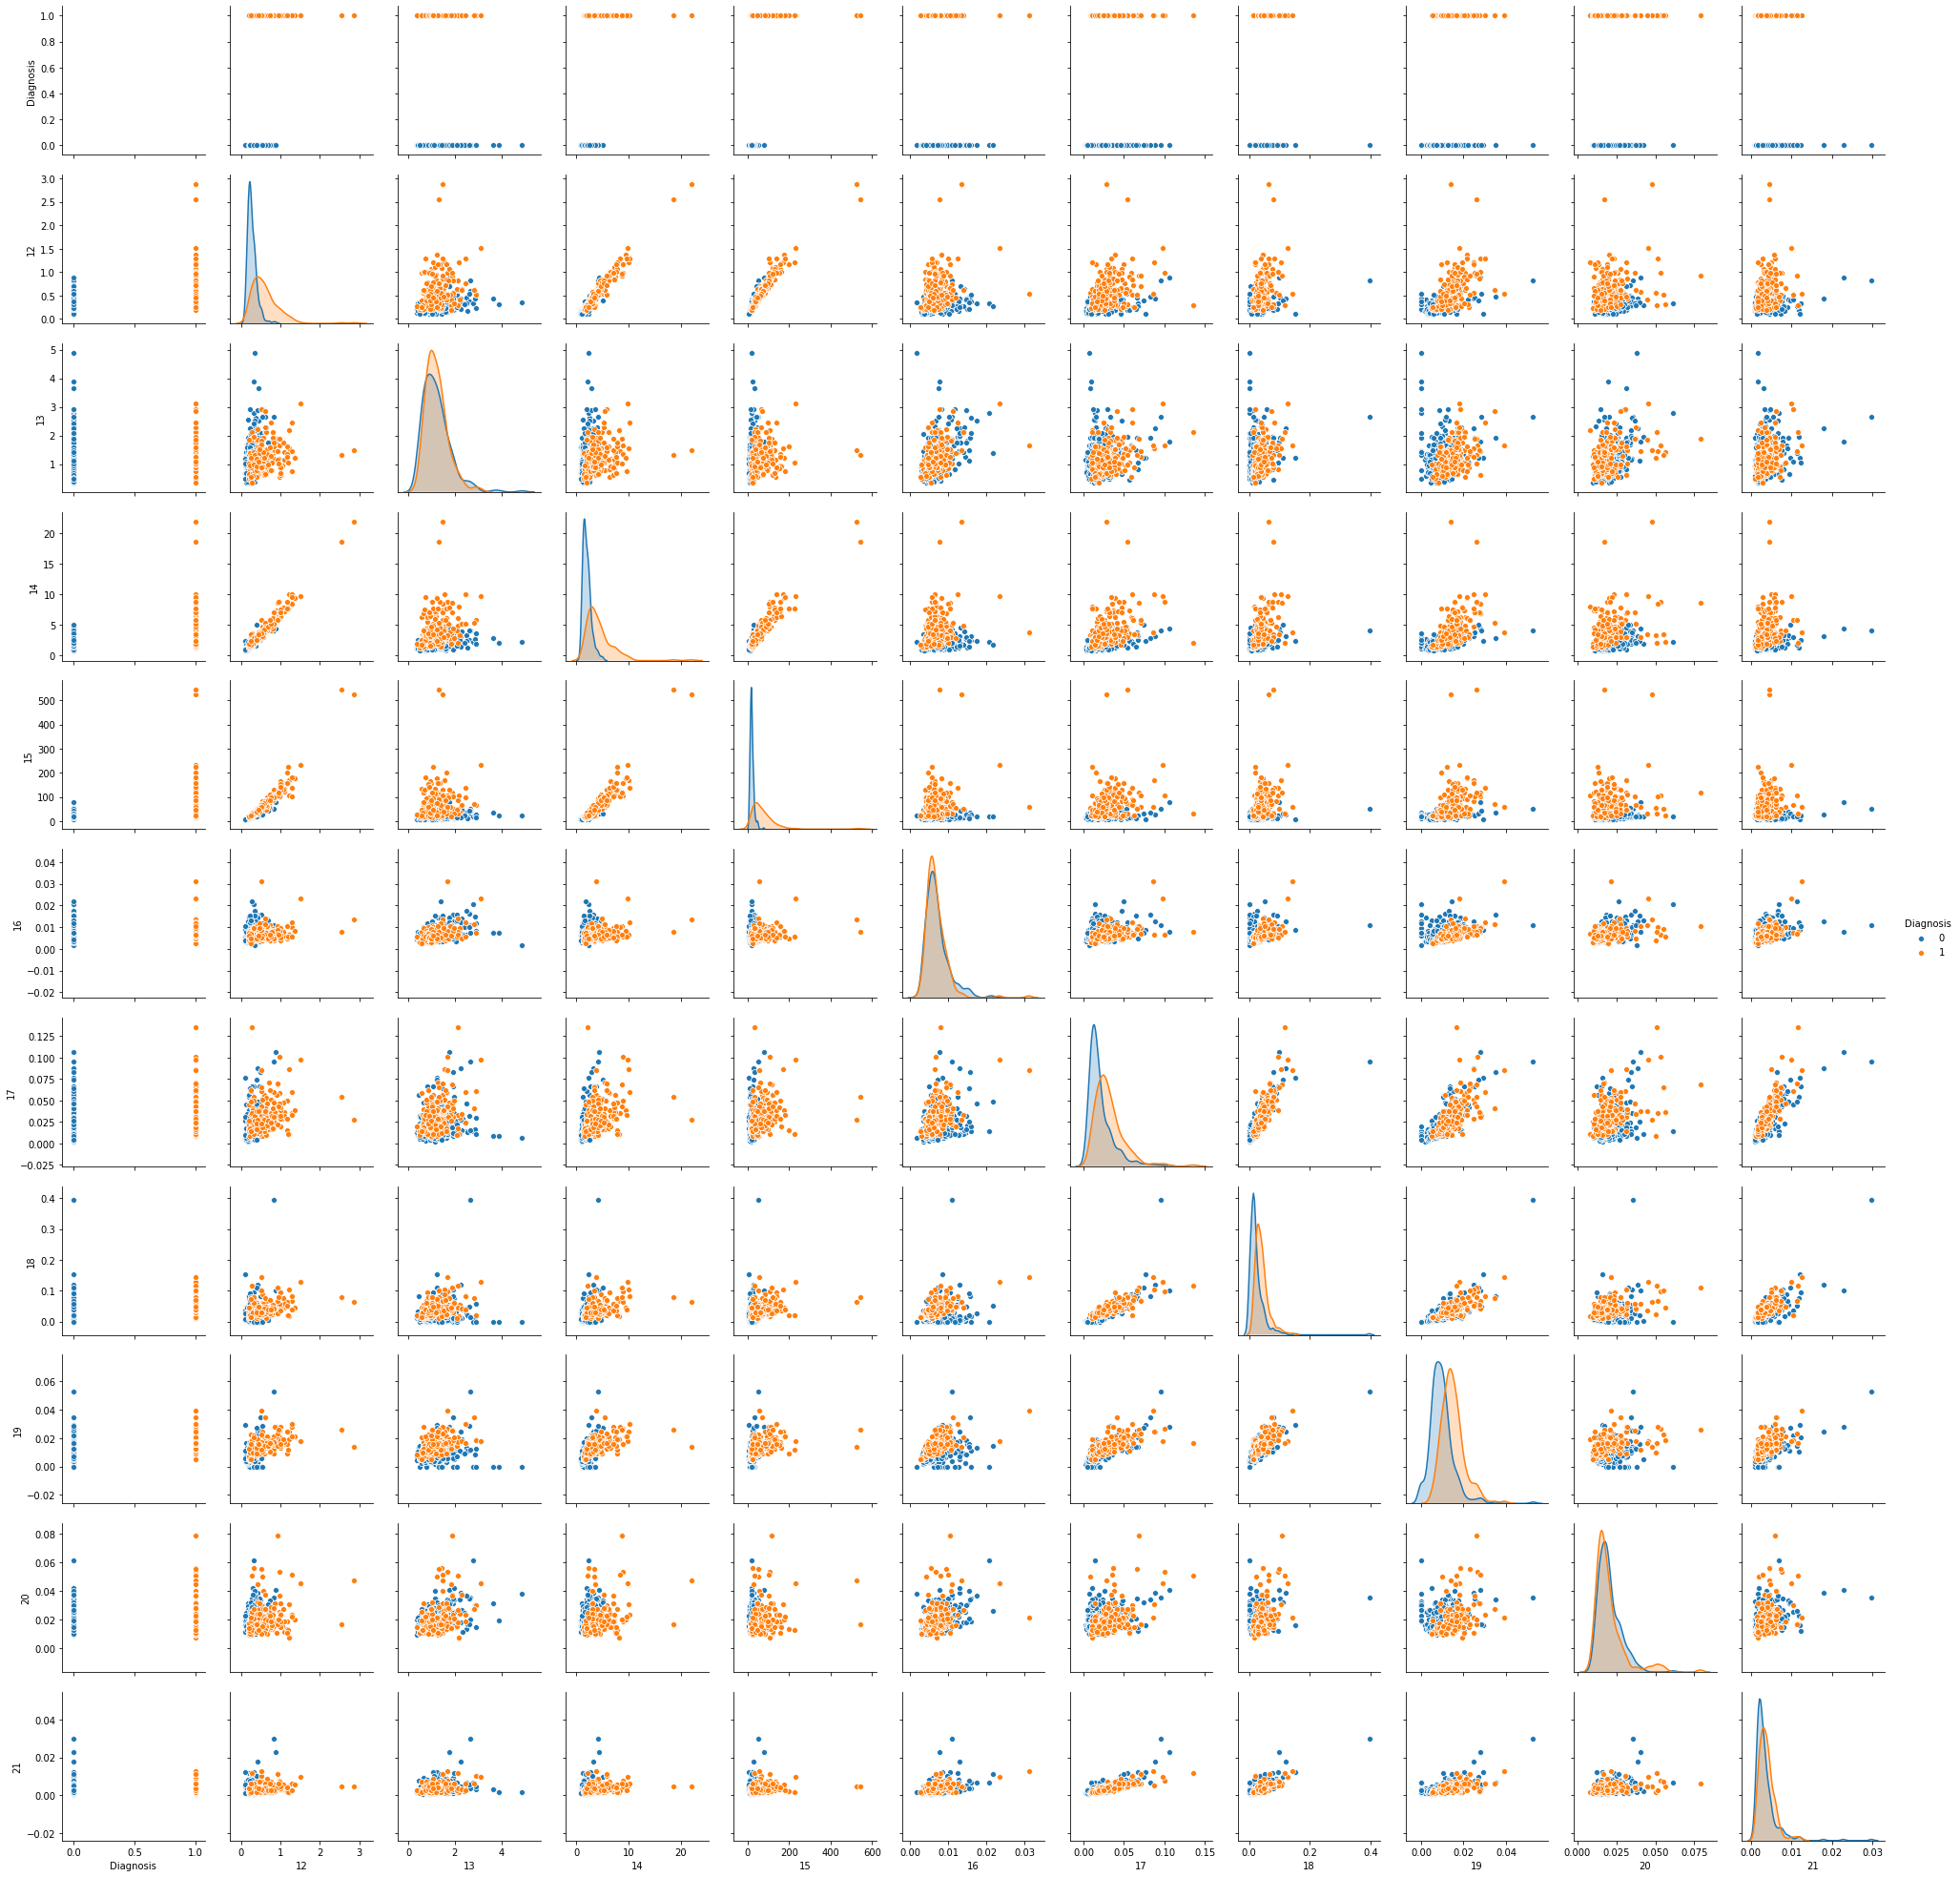

In [35]:
g1 = sns.pairplot(train_set.iloc[:, [1] + list(range(12,22))], hue='Diagnosis')

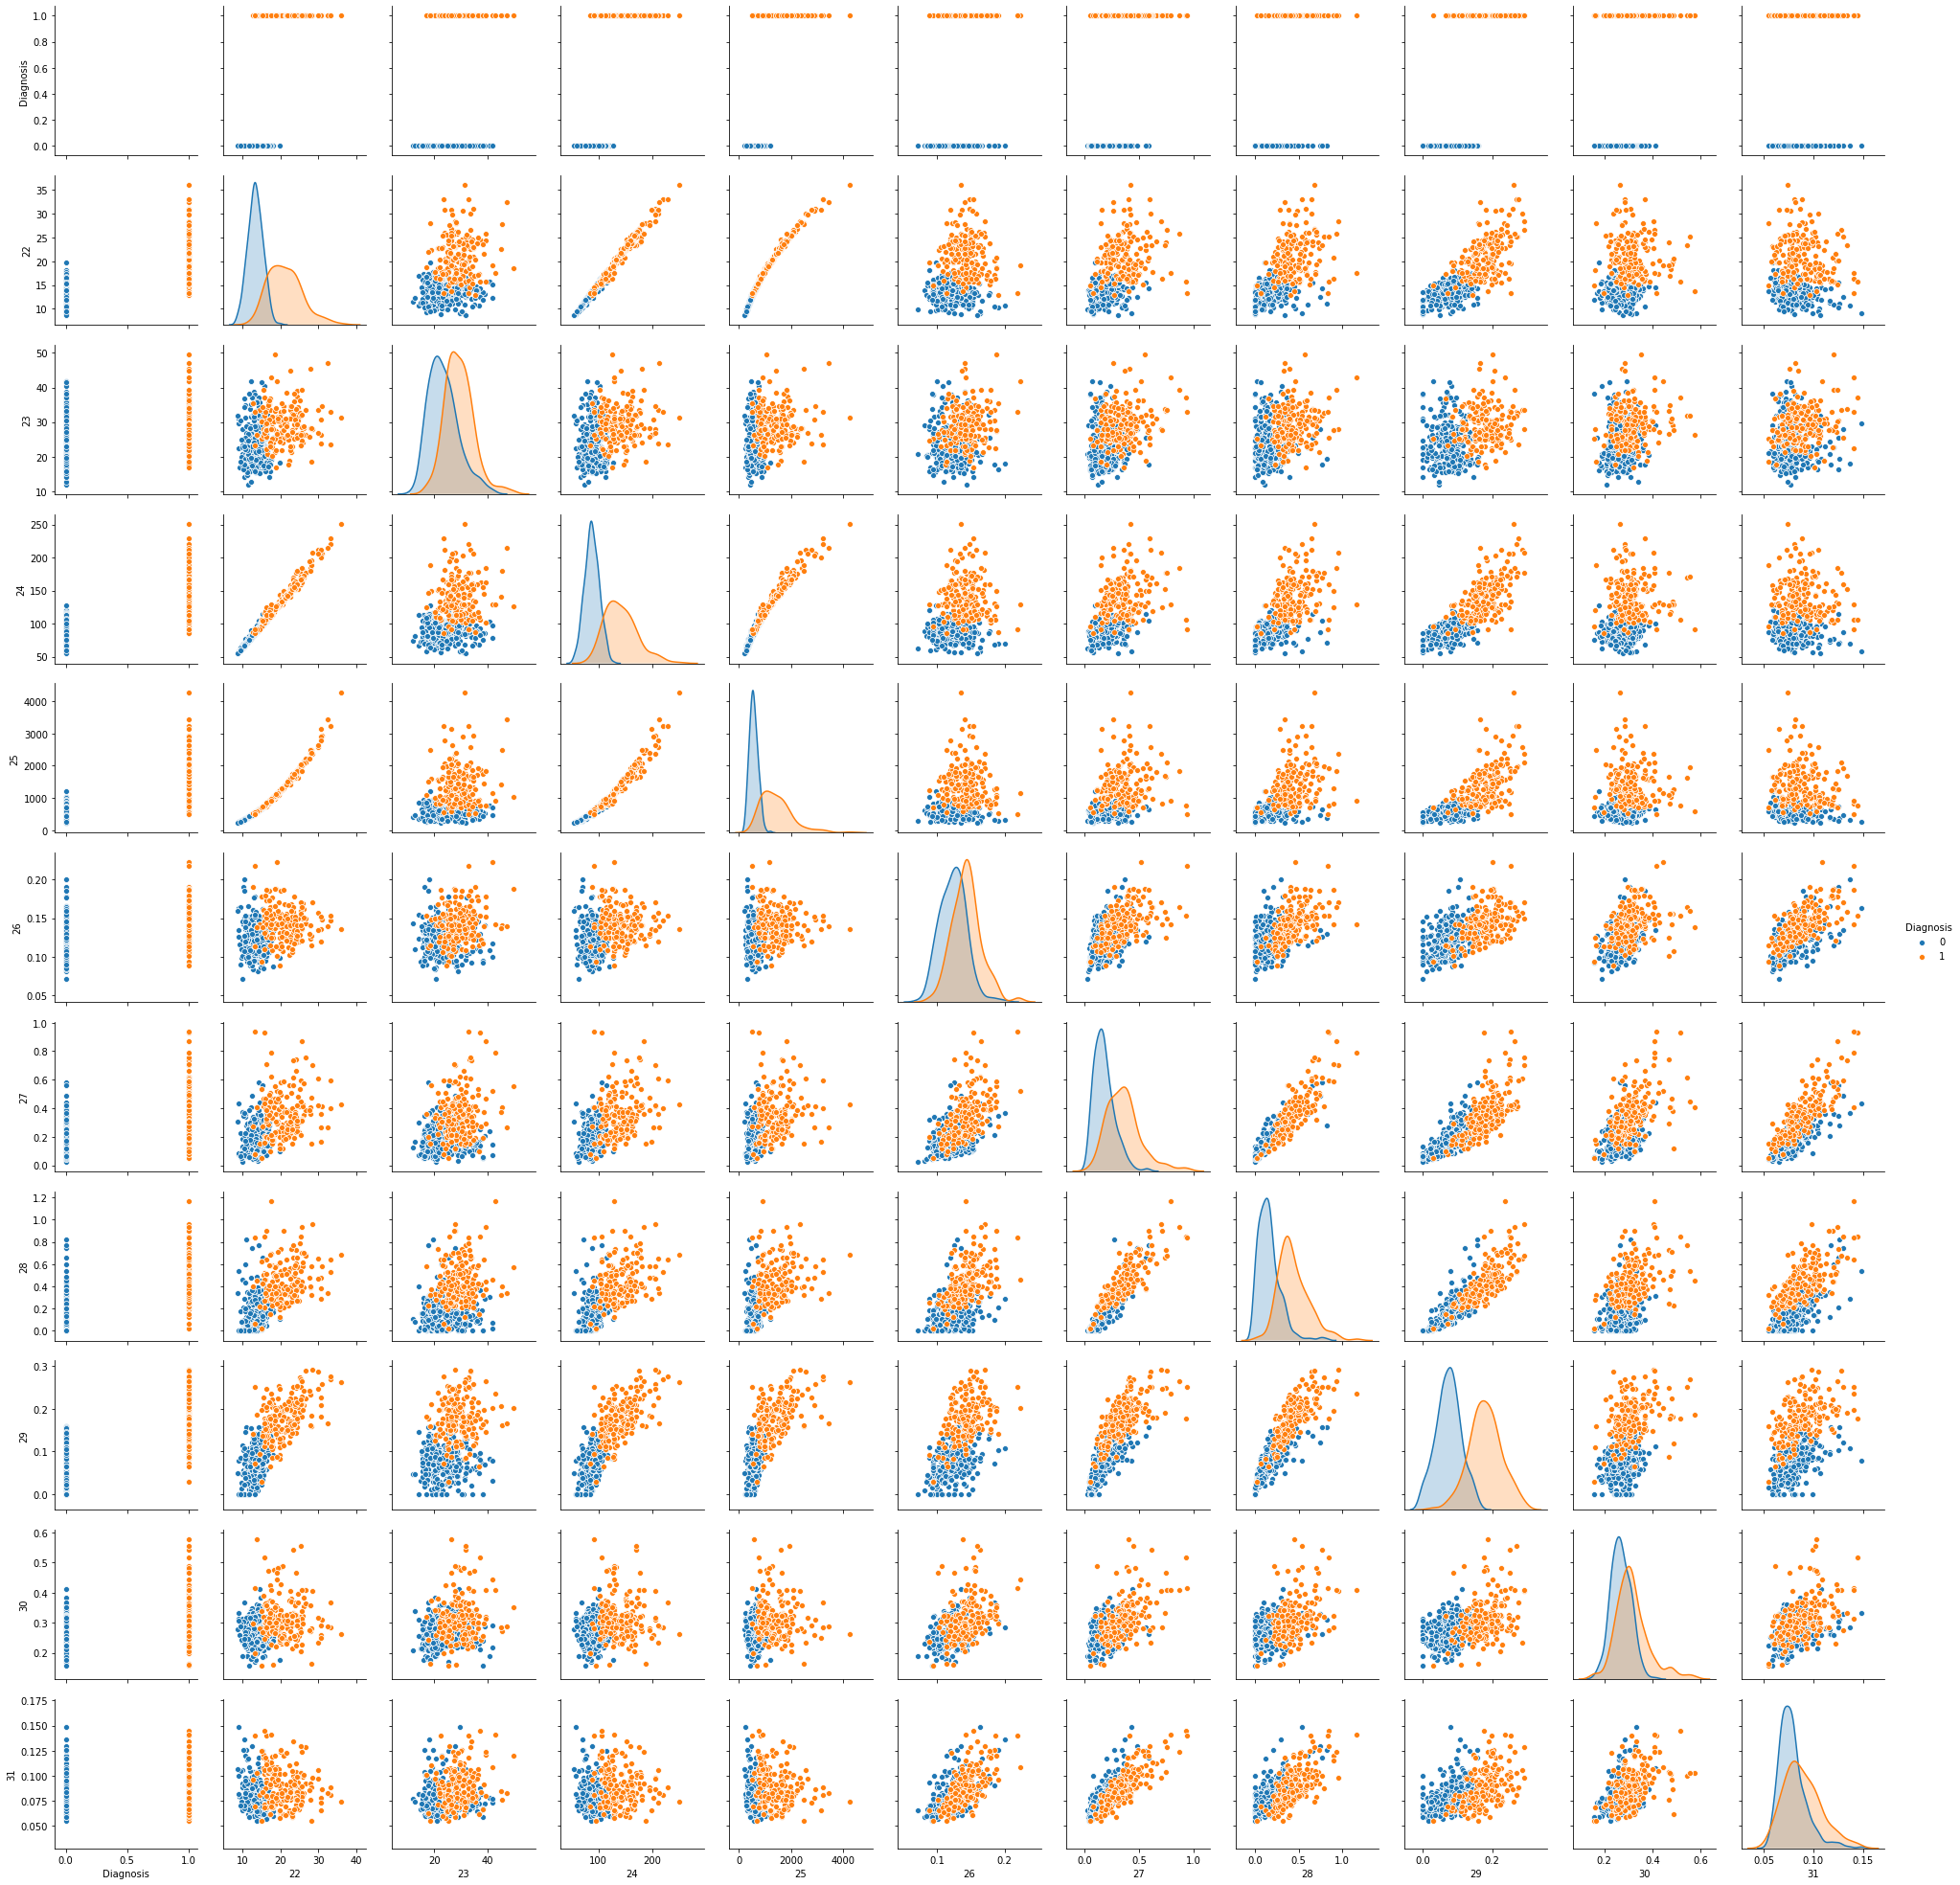

In [36]:
g2 = sns.pairplot(train_set.iloc[:, [1] + list(range(22,32))], hue='Diagnosis')

        2      3       4       5        6        7        8        9       10  \
33   19.27  26.47  127.90  1162.0  0.09401  0.17190  0.16570  0.07593  0.1853   
34   16.13  17.88  107.00   807.2  0.10400  0.15590  0.13540  0.07752  0.1998   
35   16.74  21.59  110.10   869.5  0.09610  0.13360  0.13480  0.06018  0.1896   
36   14.25  21.72   93.63   633.0  0.09823  0.10980  0.13190  0.05598  0.1885   
38   14.99  25.20   95.54   698.8  0.09387  0.05131  0.02398  0.02899  0.1565   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
558  14.59  22.68   96.39   657.1  0.08473  0.13300  0.10290  0.03736  0.1454   
559  11.51  23.93   74.52   403.5  0.09261  0.10210  0.11120  0.04105  0.1388   
560  14.05  27.15   91.38   600.4  0.09929  0.11260  0.04462  0.04304  0.1537   
561  11.20  29.37   70.67   386.0  0.07449  0.03558  0.00000  0.00000  0.1060   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          11  ...      22  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


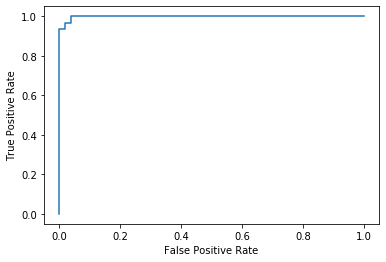

In [137]:
#1c ii.

X_train = train_set.iloc[:, 2:]
y_train = train_set.iloc[:, 1]
X_test = test_set.iloc[:, 2:]
y_test = test_set.iloc[:, 1]
print(X_train)

#make an instance of the model
lg = LogisticRegression(C=1e20)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)
predict_prob = lg.predict_proba(X_test)
print(prediction)

conf_matrix = skm.confusion_matrix(y_test, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_test, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_test, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_test, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_test, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[301   6]
 [ 11 171]]
Precision: 0.9661016949152542
Recall: 0.9395604395604396
F1 Score: 0.9526462395543176
Area Under Curve: 0.9952929806350003


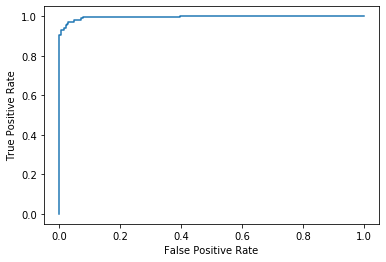

In [44]:
## PREDICTION ON TRAINING SET

prediction = lg.predict(X_train)
predict_prob = lg.predict_proba(X_train)

conf_matrix = skm.confusion_matrix(y_train, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_train, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_train, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_train, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_train, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_train, pos_prob)
print("Area Under Curve: " + str(auc))

In [6]:
#1c iii.
#X = X_train.iloc[:, 2:]
#X2 = sm.add_constant(X)
#print(X)
#print(y_train)
model = sm.Logit(y_train, X_train)
est2 = model.fit(maxiter=11)
print(est2.summary())

33     1
34     1
35     1
36     1
38     1
      ..
558    0
559    0
560    0
561    0
568    0
Name: Diagnosis, Length: 489, dtype: int64
         Current function value: 6.626952
         Iterations: 11
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  489
Model:                          Logit   Df Residuals:                      459
Method:                           MLE   Df Model:                           29
Date:                Fri, 06 Mar 2020   Pseudo R-squ.:                  -9.039
Time:                        14:20:58   Log-Likelihood:                -3240.6
converged:                      False   LL-Null:                       -322.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
2 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Confusion matrix: 
[[50  0]
 [ 2 28]]
Precision: 1.0
Recall: 0.9333333333333333
F1 Score: 0.9655172413793104
Area Under Curve: 0.9993333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


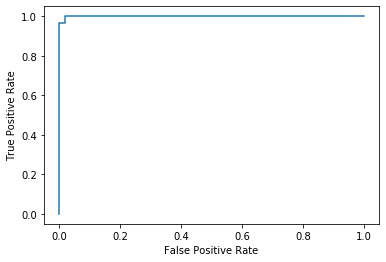

In [47]:
# DROP variable 3, 9, 10, 14, 16, 19, 20, 24, 30
# BEFORE YOU RUN THIS CELL, you need to reexecute 2 blocks up
X_train.drop(X_train.columns[[1, 7, 8, 12, 14, 17, 18, 22, 28]], axis=1, inplace=True)
X_test.drop(X_test.columns[[1, 7, 8, 12, 14, 17, 18, 22, 28]], axis=1, inplace=True)

#make an instance of the model
lg = LogisticRegression(C=1e20)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)
predict_prob = lg.predict_proba(X_test)

conf_matrix = skm.confusion_matrix(y_test, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_test, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_test, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_test, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_test, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[301   6]
 [ 11 171]]
Precision: 0.9661016949152542
Recall: 0.9395604395604396
F1 Score: 0.9526462395543176
Area Under Curve: 0.9952929806350003


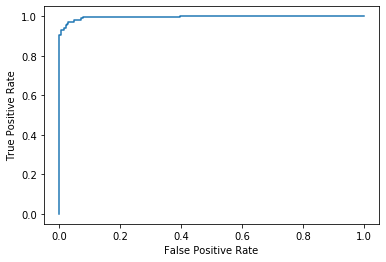

In [139]:
## PREDICTION ON TRAINING SET for PRUNED
prediction = lg.predict(X_train)
predict_prob = lg.predict_proba(X_train)

conf_matrix = skm.confusion_matrix(y_train, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_train, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_train, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_train, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_train, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_train, pos_prob)
print("Area Under Curve: " + str(auc))

In [ ]:
#c iv.

# The classes seem to be well-separated because of several reasons:
## - The scatterplots show that there is often a clear line between variables
## - The predicted probabilities of the logistic function is close to 1/0 for most data points, meaning there is a clear distinction
## - Some warning messages occur after executing the code, saying a chunk of the data may be quasi-completely separated

In [194]:
#2b
df1 = pd.read_table("../Data/wpbc.data", sep=",", header=None)
df1 = df1.rename(columns={1: "Prognosis", 34: "Lymph"})
# 1 is recurrent, 0 is nonrecurrent
df1.loc[(df1['Prognosis'] == "R"), 'Prognosis'] = 1
df1.loc[(df1['Prognosis'] == "N"), 'Prognosis'] = 0
r = df1.Prognosis[df1.Prognosis == 1].index.tolist()
n = df1.Prognosis[df1.Prognosis == 0].index.tolist()

train_index = n[:130] + r[:37]
train_index.append(r[len(r)-1])
test_index = n[130:] + r[37:len(r)-1]

test_set = df1.iloc[test_index]
train_set = df1.iloc[train_index]
#print(test_set)
#print(train_set)

In [195]:
#2c
# ? are in column 35 (#34)
#print(train_set[train_set.eq('?').any(1)])
# Temporarily drop any ? entry to calculate median
df2 = train_set[train_set.Lymph != '?']

median = df2.Lymph.median()
# median is 1

train_set2 = train_set.replace({'?':median})
#print(train_set2)

Confusion matrix: 
[[14  7]
 [ 6  3]]
Precision: 0.3
Recall: 0.3333333333333333
F1 Score: 0.3157894736842105
Area Under Curve: 0.5555555555555556


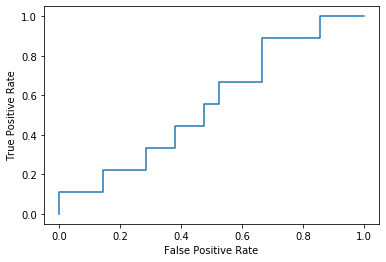

In [196]:
#2d i.
#Drop 3rd variable
X_train = train_set2.iloc[:, 3:]
y_train = train_set2.iloc[:, 1]
X_test = test_set.iloc[:, 3:]
y_test = test_set.iloc[:, 1]
nbg = GaussianNB().fit(X_train, y_train)

## PREDICTION ON TEST DATA
prediction = nbg.predict(X_test)
predict_prob = nbg.predict_proba(X_test)
conf_matrix = skm.confusion_matrix(y_test, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_test, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_test, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_test, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_test, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[98 32]
 [20 18]]
Precision: 0.36
Recall: 0.47368421052631576
F1 Score: 0.40909090909090906
Area Under Curve: 0.6757085020242914


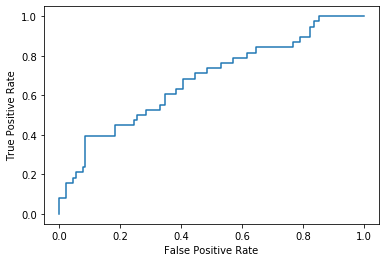

In [144]:
## PREDICTION ON TRAINING DATA
prediction = nbg.predict(X_train)
predict_prob = nbg.predict_proba(X_train)
conf_matrix = skm.confusion_matrix(y_train, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_train, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_train, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_train, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_train, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_train, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[14  7]
 [ 4  5]]
Precision: 0.4166666666666667
Recall: 0.5555555555555556
F1 Score: 0.4761904761904762
Area Under Curve: 0.6137566137566137


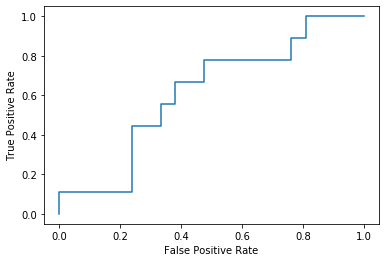

In [146]:
#2d ii. SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1.0)
X_res, y_res = smote.fit_resample(X_train, y_train)

nbg2 = GaussianNB().fit(X_res, y_res)

## PREDICTION ON TEST DATA
prediction = nbg2.predict(X_test)
predict_prob = nbg2.predict_proba(X_test)
conf_matrix = skm.confusion_matrix(y_test, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_test, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_test, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_test, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_test, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[86 44]
 [14 24]]
Precision: 0.35294117647058826
Recall: 0.631578947368421
F1 Score: 0.45283018867924524
Area Under Curve: 0.6773279352226721


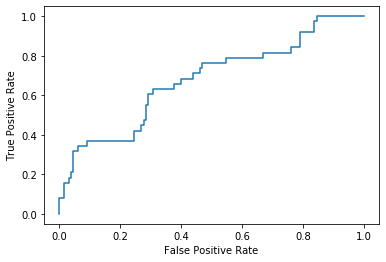

In [147]:
## PREDICTION ON TRAINING DATA
prediction = nbg2.predict(X_train)
predict_prob = nbg2.predict_proba(X_train)
conf_matrix = skm.confusion_matrix(y_train, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_train, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_train, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_train, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_train, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_train, pos_prob)
print("Area Under Curve: " + str(auc))


### DOES SMOTE HELP?
# It seems like SMOTE does marginally better than the vanilla Naive Bayes, although not by much
# Perhaps this is because the data is not that separable to begin with, so any type of enhancement can only do so much

Confusion matrix: 
[[16  5]
 [ 6  3]]
Precision: 0.375
Recall: 0.3333333333333333
F1 Score: 0.35294117647058826
Area Under Curve: 0.6216931216931216


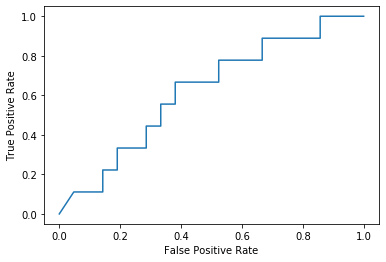

In [148]:
### EXTRA CREDIT (Multinomial Priors) ###
from sklearn.naive_bayes import MultinomialNB

nbm = MultinomialNB().fit(X_train, y_train)

## PREDICTION ON TEST DATA
prediction = nbm.predict(X_test)
predict_prob = nbm.predict_proba(X_test)
conf_matrix = skm.confusion_matrix(y_test, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_test, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_test, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_test, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_test, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[99 31]
 [22 16]]
Precision: 0.3404255319148936
Recall: 0.42105263157894735
F1 Score: 0.3764705882352941
Area Under Curve: 0.6609311740890689


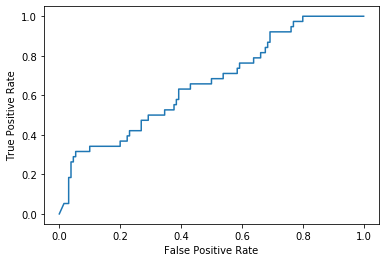

In [149]:
## PREDICTION ON TRAINING DATA
prediction = nbm.predict(X_train)
predict_prob = nbm.predict_proba(X_train)
conf_matrix = skm.confusion_matrix(y_train, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_train, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_train, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_train, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_train, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_train, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[15  6]
 [ 5  4]]
Precision: 0.4
Recall: 0.4444444444444444
F1 Score: 0.4210526315789474
Area Under Curve: 0.5793650793650793


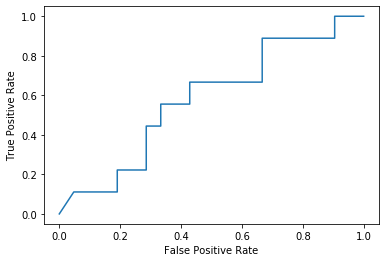

In [150]:
## MULTINOMIAL WITH SMOTE
nbm2 = MultinomialNB().fit(X_res, y_res)

## PREDICTION ON TEST DATA
prediction = nbm2.predict(X_test)
predict_prob = nbm2.predict_proba(X_test)
conf_matrix = skm.confusion_matrix(y_test, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_test, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_test, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_test, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_test, pos_prob)
print("Area Under Curve: " + str(auc))

Confusion matrix: 
[[86 44]
 [16 22]]
Precision: 0.3333333333333333
Recall: 0.5789473684210527
F1 Score: 0.4230769230769231
Area Under Curve: 0.6732793522267206


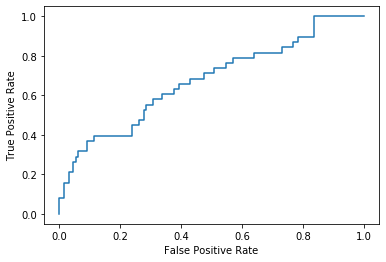

In [72]:
## PREDICTION ON TRAINING DATA
prediction = nbg2.predict(X_train)
predict_prob = nbg2.predict_proba(X_train)
conf_matrix = skm.confusion_matrix(y_train, prediction)
print("Confusion matrix: \n" + str(conf_matrix))
#ROC?

precision = skm.precision_score(y_train, prediction)
print("Precision: " + str(precision))

recall = skm.recall_score(y_train, prediction)
print("Recall: " + str(recall))
#print(precision)
#print(recall)
f1 = skm.f1_score(y_train, prediction)
print("F1 Score: " + str(f1))

#ROC
# Subset the probabilities of the positive class
pos_prob = predict_prob[:, 1]
fpr, tpr, _ = skm.roc_curve(y_train, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ROC AUC
auc = skm.roc_auc_score(y_train, pos_prob)
print("Area Under Curve: " + str(auc))

2


Text(0, 0.5, 'Mean Square Error')

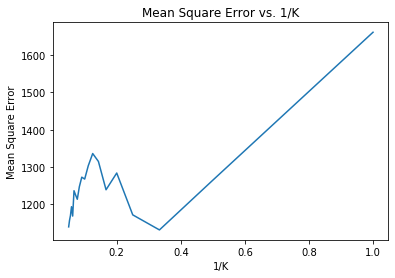

In [250]:
## 2e KNN REGRESSION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

n = train_set2[train_set2.Prognosis == 0]
r = train_set2[train_set2.Prognosis == 1]

#knr = KNeighborsRegressor()
X_train_n = n.iloc[:, 2:]
y_train_n = n.iloc[:, 1]
X_train_r = r.iloc[:, 2:]
y_train_r = r.iloc[:, 1]
y_test = test_set.iloc[:, 2]

X_trainn, X_valn, y_trainn, y_valn = train_test_split(X_train_n, y_train_n, test_size=0.2)
X_trainr, X_valr, y_trainr, y_valr = train_test_split(X_train_r, y_train_r, test_size=0.2)

X_train1 = pd.concat([X_trainn, X_trainr])
yy_train1 = X_train1.iloc[:, 0]
XX_train1 = X_train1.iloc[:, 1:]
y_train1 = pd.concat([y_trainn, y_trainr])
X_val = pd.concat([X_valn, X_valr])
yy_val = X_val.iloc[:, 0]
XX_val = X_val.iloc[:, 1:]
y_val = pd.concat([y_valn, y_valr])

k = np.linspace(1, 20, num=20)
mean_agg_te = []

for i in k:
    neigh = KNeighborsRegressor(n_neighbors=int(i))
    neigh.fit(XX_train1, yy_train1)
    
    prediction = neigh.predict(XX_val)
    mse = skm.mean_squared_error(yy_val, prediction)
    mean_agg_te.append(mse)

print(np.argmin(mean_agg_te))

plt.plot(1/k, mean_agg_te)
plt.title("Mean Square Error vs. 1/K")
plt.xlabel("1/K")
plt.ylabel("Mean Square Error")

#ideal at k=4

In [252]:
# MSE FOR K=2
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

mse = skm.mean_squared_error(y_test, prediction)
print("MSE: " + str(mse))

MSE: 179.65


3


Text(0, 0.5, 'Mean Square Error')

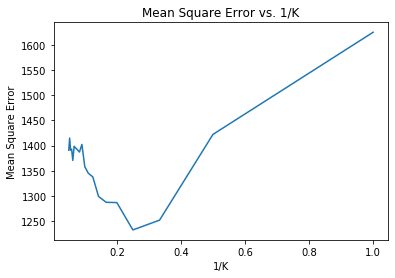

In [258]:
# SMOTE FOR KNN REGRESSION
smote = SMOTE(sampling_strategy=1.0)
X_res1, y_res1 = smote.fit_resample(X_train1, y_train1)
XX_res1 = X_res1[:, 1:]
yy_res1 = X_res1[:, 0]

k = np.linspace(1, 20, num=20)
mean_agg_te = []

for i in k:
    neigh = KNeighborsRegressor(n_neighbors=int(i))
    neigh.fit(XX_res1, yy_res1)
    
    prediction = neigh.predict(XX_val)
    mse = skm.mean_squared_error(yy_val, prediction)
    mean_agg_te.append(mse)

print(np.argmin(mean_agg_te))

plt.plot(1/k, mean_agg_te)
plt.title("Mean Square Error vs. 1/K")
plt.xlabel("1/K")
plt.ylabel("Mean Square Error")


In [259]:
# MSE FOR K=3
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

mse = skm.mean_squared_error(y_test, prediction)
print("MSE: " + str(mse))

# Barely, but SMOTE does give a more consistent k as it fluctuates less when I reexecute it

MSE: 179.65
